- https://www.analyticsvidhya.com/blog/2022/04/an-end-to-end-guide-on-time-series-forecasting-using-fbprophet/

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
# Bitcoin
BTC = pd.read_csv('archive crypto/coin_Bitcoin.csv')
BTC['Date']= pd.to_datetime(BTC['Date']).dt.date
BTC.rename(columns={'Close':'BTC_Close','Volume':'BTC_Volume'}, inplace= True)

# Ethereum
ETH = pd.read_csv('archive crypto/coin_Ethereum.csv')
ETH['Date']= pd.to_datetime(ETH['Date']).dt.date
ETH.rename(columns={'Close':'ETH_Close','Volume':'ETH_Volume'}, inplace= True)


#Binance Coin
BNB = pd.read_csv('archive crypto/coin_BinanceCoin.csv')
BNB['Date']= pd.to_datetime(BNB['Date']).dt.date
BNB.rename(columns={'Close':'BNB_Close','Volume':'BNB_Volume'}, inplace= True)


In [3]:
BTC[['Date','BTC_Close']]

,Date,BTC_Close
0,2013-04-29,144.539993
1,2013-04-30,139.000000
2,2013-05-01,116.989998
3,2013-05-02,105.209999
4,2013-05-03,97.750000
...,...,...
2986,2021-07-02,33897.048590
2987,2021-07-03,34668.548402
2988,2021-07-04,35287.779766
2989,2021-07-05,33746.002456


### Bitcoin

In [4]:
Bitcoin = BTC[['Date','BTC_Close']]
Bitcoin.rename(columns={'Date': 'ds', 'BTC_Close': 'y'}, inplace=True)
# Bitcoin = Bitcoin.set_index('Date')
# Bitcoin = Bitcoin[['BTC_Close']]
Bitcoin

# Ethereum = ETH[['Date','ETH_Close']]
# # Ethereum = Ethereum.set_index('Date')
# # Ethereum = Ethereum[['ETH_Close']]
# Ethereum.rename(columns={'Date': 'ds', 'ETH_Close': 'y'}, inplace=True)
# print(Ethereum.head())

# Binance = BNB[['Date','BNB_Close']]
# Binance.rename(columns={'Date': 'ds', 'BNB_Close': 'y'}, inplace=True)
# # Binance = Binance.set_index('Date')
# # Binance = Binance[['BNB_Close']]
# print(Binance.head())

C:\Users\jayku\AppData\Local\Temp\ipykernel_25760\2459997689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bitcoin.rename(columns={'Date': 'ds', 'BTC_Close': 'y'}, inplace=True)


,ds,y
0,2013-04-29,144.539993
1,2013-04-30,139.000000
2,2013-05-01,116.989998
3,2013-05-02,105.209999
4,2013-05-03,97.750000
...,...,...
2986,2021-07-02,33897.048590
2987,2021-07-03,34668.548402
2988,2021-07-04,35287.779766
2989,2021-07-05,33746.002456


In [5]:
from fbprophet import Prophet

In [6]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [7]:
# Initialize the Model
model=Prophet()

In [8]:
Bitcoin.columns

Index(['ds', 'y'], dtype='object')

In [9]:
Bitcoin.head()

,ds,y
0,2013-04-29,144.539993
1,2013-04-30,139.000000
2,2013-05-01,116.989998
3,2013-05-02,105.209999
4,2013-05-03,97.750000


In [10]:
model.fit(Bitcoin)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [11]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [12]:
Bitcoin.tail()

,ds,y
2986,2021-07-02,33897.048590
2987,2021-07-03,34668.548402
2988,2021-07-04,35287.779766
2989,2021-07-05,33746.002456
2990,2021-07-06,34235.193451


In [13]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [14]:
future_dates.tail()

,ds
3351,2022-07-02
3352,2022-07-03
3353,2022-07-04
3354,2022-07-05
3355,2022-07-06


In [15]:
prediction=model.predict(future_dates)

C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [16]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-29,676.416578,-4116.002002,8102.713425,676.416578,676.416578,1541.258182,1541.258182,1541.258182,-7.018277,-7.018277,-7.018277,1548.276459,1548.276459,1548.276459,0.0,0.0,0.0,2217.674759
1,2013-04-30,675.948475,-3769.161128,8259.580126,675.948475,675.948475,1528.375616,1528.375616,1528.375616,-8.708224,-8.708224,-8.708224,1537.083840,1537.083840,1537.083840,0.0,0.0,0.0,2204.324091
2,2013-05-01,675.480373,-3782.307429,8244.978420,675.480373,675.480373,1529.625343,1529.625343,1529.625343,11.432064,11.432064,11.432064,1518.193278,1518.193278,1518.193278,0.0,0.0,0.0,2205.105716
3,2013-05-02,675.012271,-4262.552548,8514.502743,675.012271,675.012271,1493.140979,1493.140979,1493.140979,2.335335,2.335335,2.335335,1490.805643,1490.805643,1490.805643,0.0,0.0,0.0,2168.153250
4,2013-05-03,674.544169,-4136.954829,7970.818706,674.544169,674.544169,1459.402163,1459.402163,1459.402163,5.114592,5.114592,5.114592,1454.287571,1454.287571,1454.287571,0.0,0.0,0.0,2133.946332


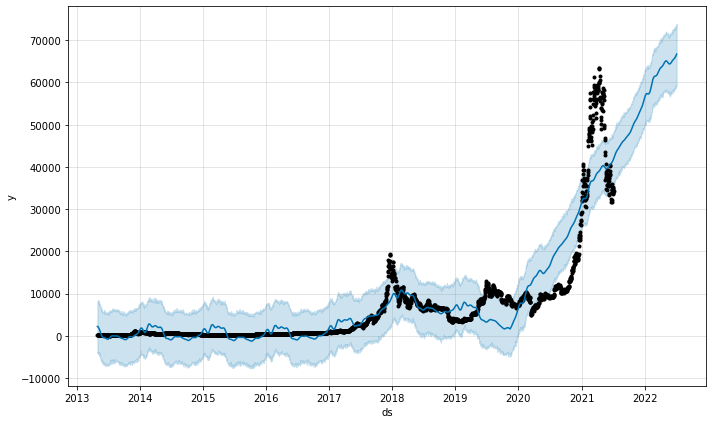

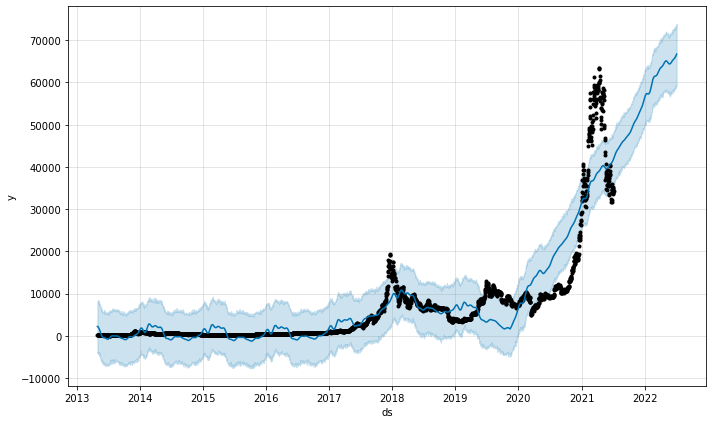

In [17]:
### plot the predicted projection
model.plot(prediction)

C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


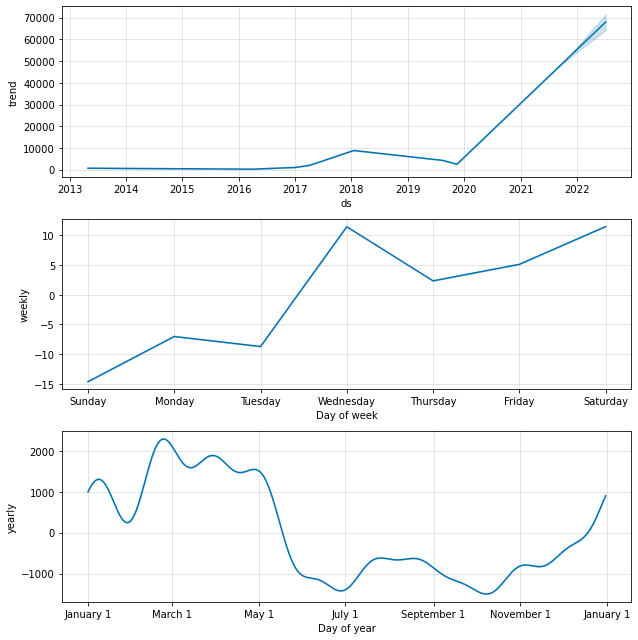

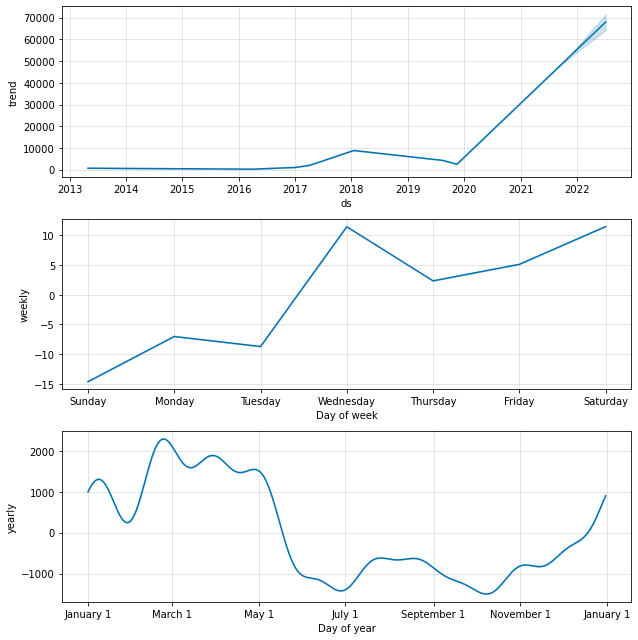

In [18]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [19]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 11 forecasts with cutoffs between 2015-08-02 00:00:00 and 2020-07-06 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-08-03,287.745743,216.223642,359.329356,281.226990,2015-08-02
1,2015-08-04,288.897607,214.275482,362.304312,285.217987,2015-08-02
2,2015-08-05,286.971580,211.618757,362.084679,281.881989,2015-08-02
3,2015-08-06,285.087805,212.336371,357.985427,278.576996,2015-08-02
4,2015-08-07,282.993965,209.139580,354.662718,279.584991,2015-08-02


In [20]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,5.731849e+06,2394.127956,1447.490624,0.240565,0.183874,0.442983
1,38 days,5.827983e+06,2414.121683,1465.104144,0.244273,0.186296,0.433008
2,39 days,5.911960e+06,2431.452314,1480.913101,0.247673,0.187684,0.421673
3,40 days,5.983773e+06,2446.175207,1494.952100,0.250900,0.191470,0.411698
4,41 days,6.071517e+06,2464.044786,1511.566919,0.254216,0.194922,0.404443


In [21]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,5.731849e+06,2394.127956,1447.490624,0.240565,0.183874,0.442983
1,38 days,5.827983e+06,2414.121683,1465.104144,0.244273,0.186296,0.433008
2,39 days,5.911960e+06,2431.452314,1480.913101,0.247673,0.187684,0.421673
3,40 days,5.983773e+06,2446.175207,1494.952100,0.250900,0.191470,0.411698
4,41 days,6.071517e+06,2464.044786,1511.566919,0.254216,0.194922,0.404443


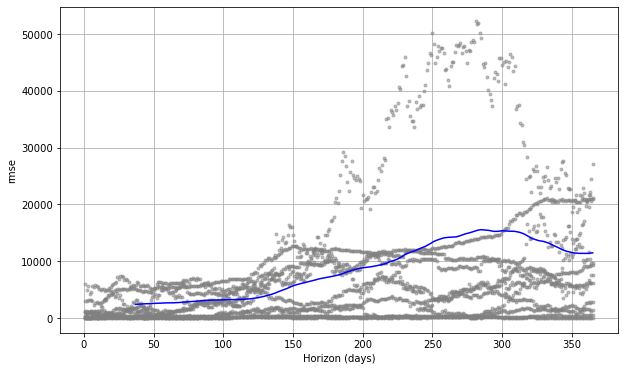

In [22]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### Ethereum

In [23]:
Ethereum = ETH[['Date','ETH_Close']]
# Ethereum = Ethereum.set_index('Date')
# Ethereum = Ethereum[['ETH_Close']]
Ethereum.rename(columns={'Date': 'ds', 'ETH_Close': 'y'}, inplace=True)
Ethereum.head()

C:\Users\jayku\AppData\Local\Temp\ipykernel_25760\1976896708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ethereum.rename(columns={'Date': 'ds', 'ETH_Close': 'y'}, inplace=True)


,ds,y
0,2015-08-08,0.753325
1,2015-08-09,0.701897
2,2015-08-10,0.708448
3,2015-08-11,1.067860
4,2015-08-12,1.217440


In [24]:
Ethereum.columns

Index(['ds', 'y'], dtype='object')

In [25]:
model_1 = Prophet()

In [26]:
model_1.fit(Ethereum)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [27]:
model_1.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [28]:
Ethereum.tail()

,ds,y
2155,2021-07-02,2150.040364
2156,2021-07-03,2226.114282
2157,2021-07-04,2321.724112
2158,2021-07-05,2198.582464
2159,2021-07-06,2324.679449


In [29]:
### Create future dates of 365 days
future_dates=model_1.make_future_dataframe(periods=365)

In [30]:
future_dates.tail()

,ds
2520,2022-07-02
2521,2022-07-03
2522,2022-07-04
2523,2022-07-05
2524,2022-07-06


In [31]:
prediction=model.predict(future_dates)

C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [32]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-08-08,287.423952,-6490.577111,5985.688557,287.423952,287.423952,-653.624380,-653.624380,-653.624380,11.460673,11.460673,11.460673,-665.085053,-665.085053,-665.085053,0.0,0.0,0.0,-366.200428
1,2015-08-09,286.955850,-6496.862471,6004.683436,286.955850,286.955850,-677.692335,-677.692335,-677.692335,-14.616163,-14.616163,-14.616163,-663.076173,-663.076173,-663.076173,0.0,0.0,0.0,-390.736485
2,2015-08-10,286.487748,-6406.057315,5674.476373,286.487748,286.487748,-666.925282,-666.925282,-666.925282,-7.018277,-7.018277,-7.018277,-659.907005,-659.907005,-659.907005,0.0,0.0,0.0,-380.437534
3,2015-08-11,286.019646,-6352.319019,5568.223896,286.019646,286.019646,-664.507686,-664.507686,-664.507686,-8.708224,-8.708224,-8.708224,-655.799462,-655.799462,-655.799462,0.0,0.0,0.0,-378.488040
4,2015-08-12,285.551545,-6434.780036,5743.860245,285.551545,285.551545,-639.601032,-639.601032,-639.601032,11.432064,11.432064,11.432064,-651.033096,-651.033096,-651.033096,0.0,0.0,0.0,-354.049487


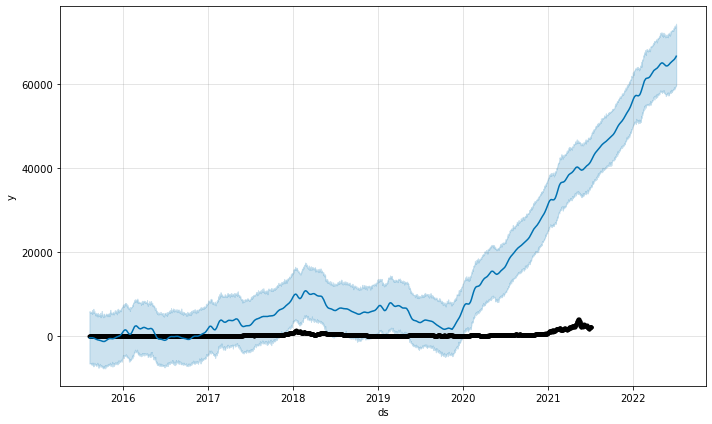

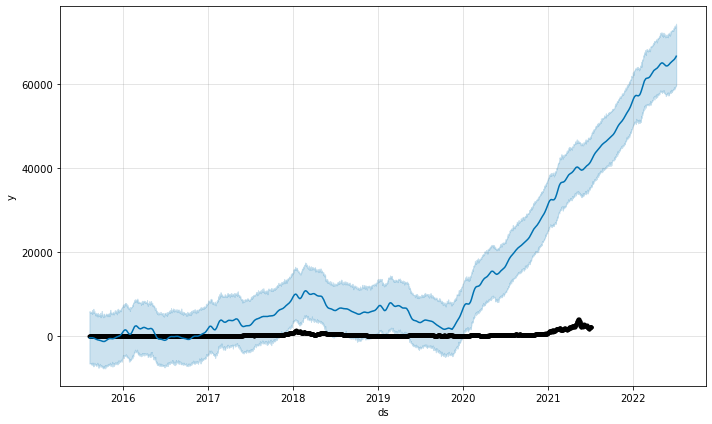

In [33]:
### plot the predicted projection
model_1.plot(prediction)

C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


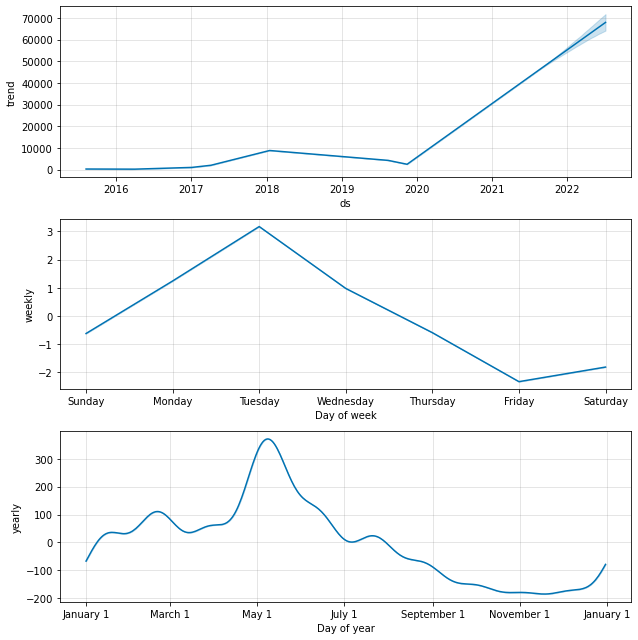

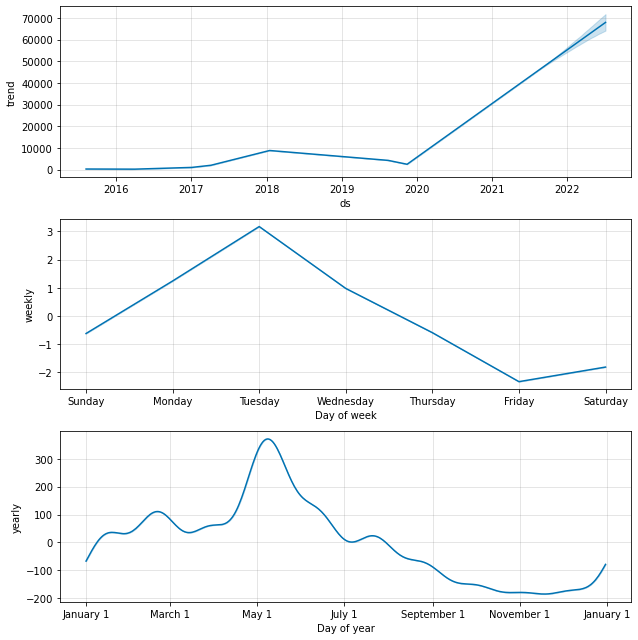

In [34]:
#### Visualize Each Components[Trends,yearly]
model_1.plot_components(prediction)


In [35]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_1, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 6 forecasts with cutoffs between 2018-01-18 00:00:00 and 2020-07-06 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-01-19,1071.969206,1020.324558,1120.227966,1039.099976,2018-01-18
1,2018-01-20,1078.601322,1028.271201,1129.929130,1155.150024,2018-01-18
2,2018-01-21,1083.763731,1034.203268,1133.297454,1049.579956,2018-01-18
3,2018-01-22,1089.868166,1038.995624,1141.945848,1003.260010,2018-01-18
4,2018-01-23,1096.130252,1048.497628,1149.747706,986.229004,2018-01-18


In [36]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,25746.242825,160.456358,109.530991,0.361020,0.262866,0.545662
1,38 days,27554.110986,165.994310,113.574247,0.368453,0.278511,0.534247
2,39 days,29310.787773,171.203936,117.522558,0.375649,0.291842,0.522831
3,40 days,31064.936675,176.252480,121.502431,0.383120,0.303798,0.511416
4,41 days,32947.766134,181.515195,125.536440,0.390530,0.366257,0.502283


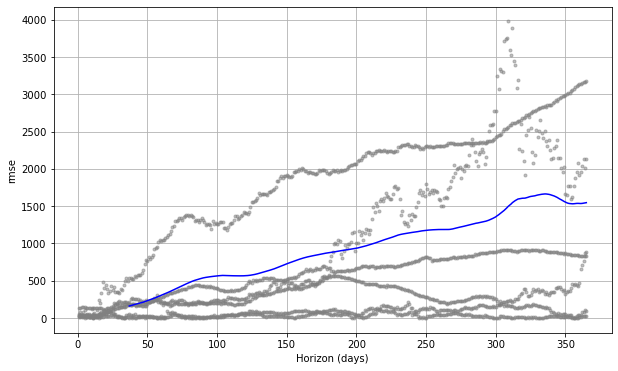

In [37]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### Binance

In [38]:
Binance = BNB[['Date','BNB_Close']]
Binance.rename(columns={'Date': 'ds', 'BNB_Close': 'y'}, inplace=True)
Binance.head()

C:\Users\jayku\AppData\Local\Temp\ipykernel_25760\3945791257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Binance.rename(columns={'Date': 'ds', 'BNB_Close': 'y'}, inplace=True)


,ds,y
0,2017-07-26,0.105138
1,2017-07-27,0.107737
2,2017-07-28,0.104067
3,2017-07-29,0.107811
4,2017-07-30,0.106414


In [39]:
model_2 = Prophet()

In [40]:
model_2.fit(Binance)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [41]:
model_2.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [42]:
Binance.tail()

,ds,y
1437,2021-07-02,287.423094
1438,2021-07-03,298.237117
1439,2021-07-04,307.732096
1440,2021-07-05,302.377980
1441,2021-07-06,320.934802


In [43]:
### Create future dates of 365 days
future_dates=model_2.make_future_dataframe(periods=365)

In [44]:
future_dates.tail()

,ds
1802,2022-07-02
1803,2022-07-03
1804,2022-07-04
1805,2022-07-05
1806,2022-07-06


In [45]:
prediction=model_2.predict(future_dates)

C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [46]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-07-26,2.828258,-36.902840,74.192744,2.828258,2.828258,16.039570,16.039570,16.039570,0.118337,0.118337,0.118337,15.921233,15.921233,15.921233,0.0,0.0,0.0,18.867828
1,2017-07-27,2.866736,-42.376484,74.278690,2.866736,2.866736,15.622650,15.622650,15.622650,0.132624,0.132624,0.132624,15.490027,15.490027,15.490027,0.0,0.0,0.0,18.489386
2,2017-07-28,2.905213,-39.715421,78.676093,2.905213,2.905213,15.015922,15.015922,15.015922,0.127194,0.127194,0.127194,14.888728,14.888728,14.888728,0.0,0.0,0.0,17.921135
3,2017-07-29,2.943691,-42.640718,71.086636,2.943691,2.943691,13.512766,13.512766,13.512766,-0.631773,-0.631773,-0.631773,14.144539,14.144539,14.144539,0.0,0.0,0.0,16.456457
4,2017-07-30,2.982169,-42.333408,76.871812,2.982169,2.982169,12.958801,12.958801,12.958801,-0.328153,-0.328153,-0.328153,13.286953,13.286953,13.286953,0.0,0.0,0.0,15.940970


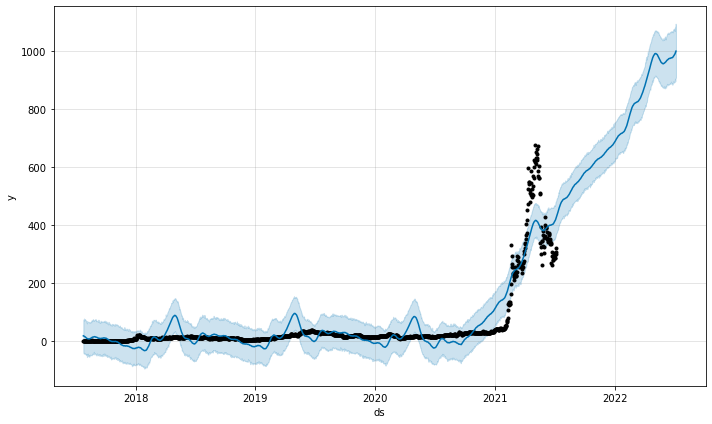

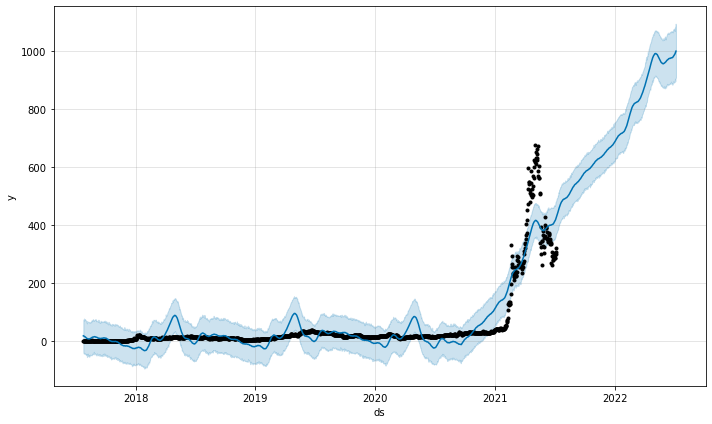

In [47]:
### plot the predicted projection
model_2.plot(prediction)

C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


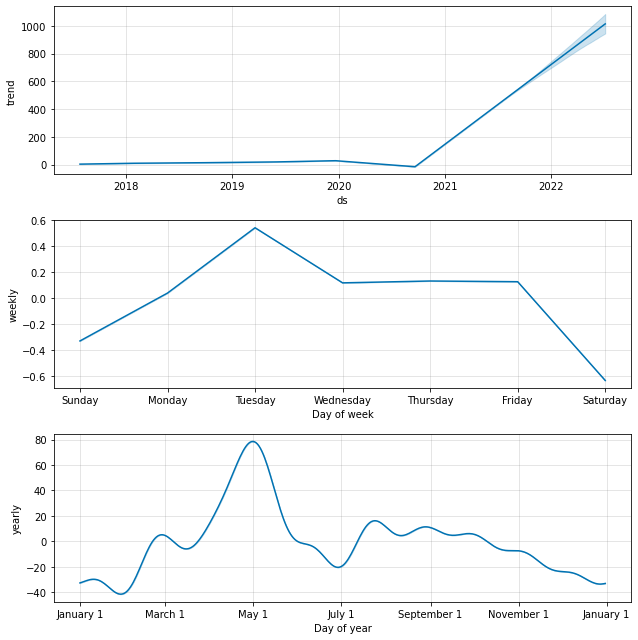

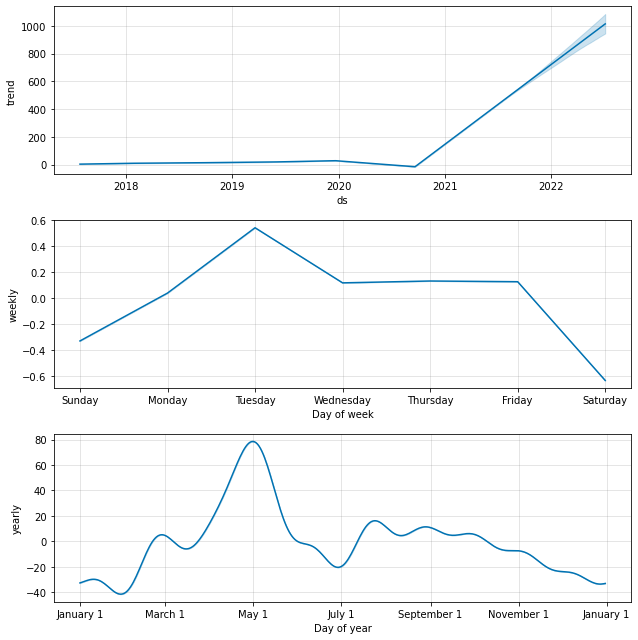

In [48]:
#### Visualize Each Components[Trends,yearly]
model_2.plot_components(prediction)

In [49]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_2, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-01-08 00:00:00 and 2020-07-06 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jayku\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-09,17.493169,15.291671,19.868504,14.498314,2020-01-08
1,2020-01-10,17.802654,15.643927,19.962325,15.025826,2020-01-08
2,2020-01-11,18.039618,15.659187,20.240503,14.946328,2020-01-08
3,2020-01-12,17.978005,15.709349,20.192649,15.322083,2020-01-08
4,2020-01-13,18.008623,15.636824,20.142409,15.227272,2020-01-08


In [50]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,50.962466,7.138800,5.900670,0.286906,0.277710,0.198630
1,38 days,54.044971,7.351528,6.124670,0.295127,0.284265,0.191781
2,39 days,57.249684,7.566352,6.348638,0.303181,0.324801,0.191781
3,40 days,60.447023,7.774768,6.571304,0.311185,0.335063,0.191781
4,41 days,64.026779,8.001674,6.807335,0.319514,0.364347,0.191781


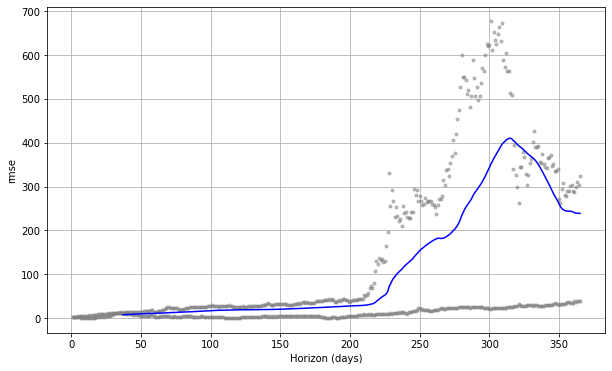

In [51]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')